# Task 2. Named entity recognition + image classification
The main goal of task is to understand what the user is asking using NLP and check if
he is correct or not using Computer Vision.

Before starting we need to install requirements.

In [39]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Two preprocessed datasets were used for training. To execute all further code, you need to download the archives with the datasets and unzip them. You can download them from Google Drive at this [link](https://drive.google.com/drive/folders/1aifEZPkfM_9oWubFLyK7S0AzjBXF1mUG?usp=drive_link). You should unzip each folder in ./Tesk-tasks/Task2/[folder_name]. You also need to download models from the same Google Drive link. Place the file 'cv_model.pth' in the directory ./Test-tasks/Task2. Unzip the 'ner_model' archive into ./Test-tasks/Task2/ner_model.

Import libraries

In [40]:
from datasets import load_from_disk
from IPython.display import Image, display
import matplotlib.pyplot as plt
import random
import os

# NER dataset

The main task of this NER model is recognizing animal titles. For this task were used an own dataset. This dataset has sentences, which containt animal titles. Sentences were generated by ChatGPT. The train dataset contains 95 rows, the validation dataset has 25 rows and the test one has 21 rows.

In [41]:
loaded_train_ds = load_from_disk("data_ner/train_dataset")
loaded_valid_ds = load_from_disk("data_ner/valid_dataset")
loaded_test_ds = load_from_disk("data_ner/test_dataset")

print("Train dataset structure:", loaded_train_ds)
print("Validation dataset structure:", loaded_valid_ds)
print("Test dataset structure:", loaded_test_ds)

Train dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 95
})
Validation dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 25
})
Test dataset structure: Dataset({
    features: ['id', 'ner_tags', 'tokens'],
    num_rows: 21
})


In [42]:
print("Row example:", loaded_train_ds[0])

Row example: {'id': 0, 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'tokens': ['', 'As', 'soon', 'as', 'we', 'entered', 'the', 'wildlife', 'reserve,', 'a', 'group', 'of', 'elephants', 'was', 'bathing', 'in', 'a', 'small', 'lake.', '']}


# CV dataset

The main task of this model is classifying animal from an image. For this task were used a [dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals) from Kaggle. For training were used 18 of 90 classes. Each image were augmented 3 times using rotation, horizontal flip, resized crop. 20% of images of each class were randomly chosed for validation dataset and 10% randomly chosed for test dataset.

In [43]:
def count_files_in_directory(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return len(files)

def count_files_in_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    class_counts = {}
    
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        file_count = count_files_in_directory(subdirectory_path)
        class_counts[subdirectory] = file_count
    return class_counts

In [44]:
print("Quantity of images in train dataset:")
directory = 'data_cv/train'
class_counts = count_files_in_subdirectories(directory)

for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


Quantity of images in train dataset:
bear: 183 images
cat: 181 images
cow: 184 images
crab: 178 images
crow: 177 images
deer: 180 images
dog: 180 images
duck: 177 images
flamingo: 184 images
fox: 181 images
goat: 182 images
goose: 183 images
horse: 182 images
lion: 181 images
owl: 179 images
tiger: 187 images
wolf: 186 images
zebra: 182 images


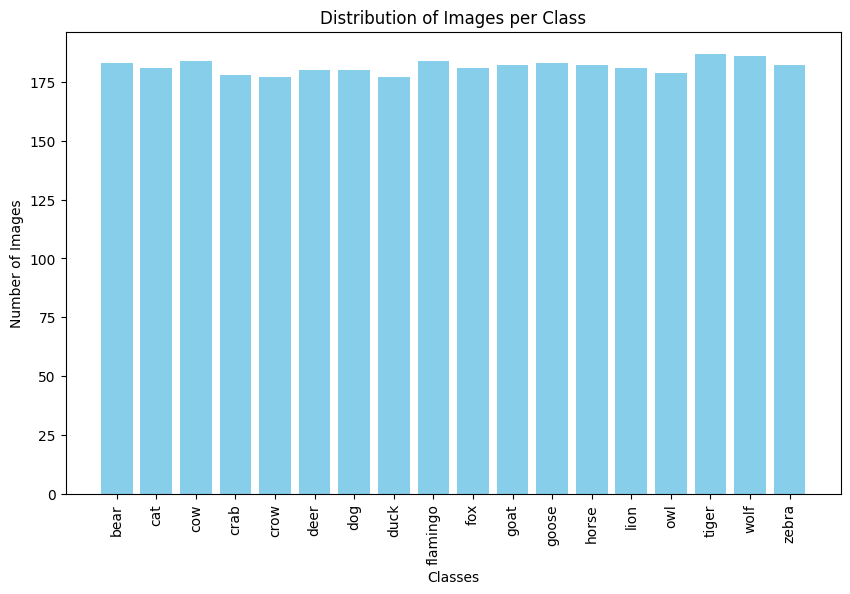

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)
plt.show()

As we can see, datasets are balanced.

In [46]:
print("Quantity of images in validation dataset:")
directory = 'data_cv/valid'
class_counts = count_files_in_subdirectories(directory)

for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Quantity of images in validation dataset:
bear: 71 images
cat: 75 images
cow: 69 images
crab: 69 images
crow: 71 images
deer: 72 images
dog: 71 images
duck: 69 images
flamingo: 75 images
fox: 72 images
goat: 74 images
goose: 70 images
horse: 73 images
lion: 74 images
owl: 72 images
tiger: 71 images
wolf: 75 images
zebra: 74 images


In [47]:
print("Quantity of images in test dataset:")
directory = 'data_cv/test'
class_counts = count_files_in_subdirectories(directory)

for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Quantity of images in test dataset:
bear: 39 images
cat: 38 images
cow: 40 images
crab: 37 images
crow: 38 images
deer: 39 images
dog: 39 images
duck: 39 images
flamingo: 39 images
fox: 37 images
goat: 34 images
goose: 40 images
horse: 39 images
lion: 36 images
owl: 37 images
tiger: 39 images
wolf: 39 images
zebra: 38 images


Random example of image

cat


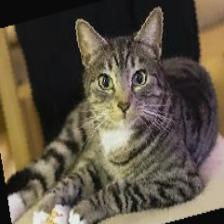

In [48]:
def display_random_image(directory):
    subdir = random.choice([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    image = random.choice([f for f in os.listdir(os.path.join(directory, subdir)) if os.path.isfile(os.path.join(directory, subdir, f))])
    print(f"{subdir}")
    display(Image(filename=os.path.join(directory, subdir, image)))

directory = 'data_cv/test'
display_random_image(directory)


# Test cases

The first input is text, which contain an animal title. The second input is path to image.

Case 1: correct statement.

There is a cow in the picture.


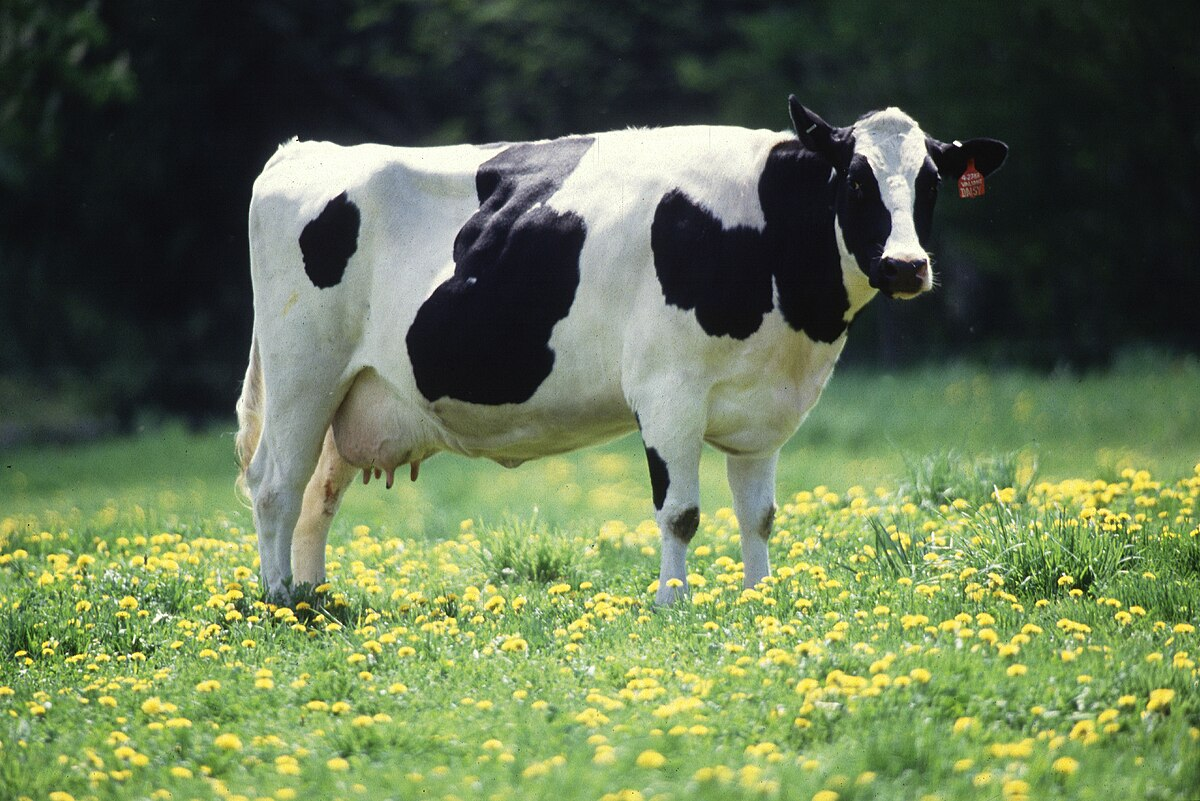

In [49]:
print("There is a cow in the picture.")
display(Image(filename="test_images/cow.jpg", width=300))

In [50]:
!python pipeline.py "There is a cow in the picture." "test_images/cow.jpg"

Processing...
True


Device set to use cpu


Case 2: incorrect statement.

It's a bird!


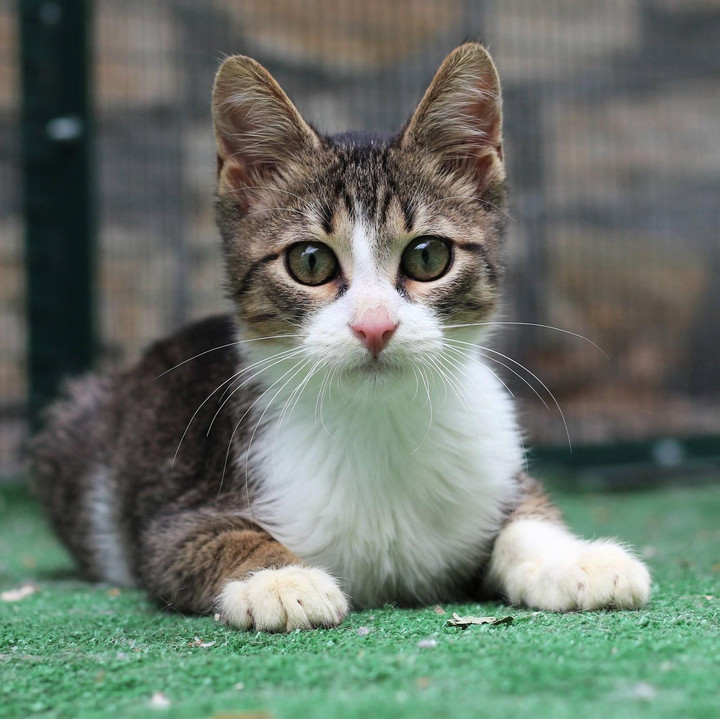

In [51]:
print("It's a bird!")
display(Image(filename="test_images/cat.jpg", width=300))

In [52]:
!python pipeline.py "It's a bird!" "test_images/cat.jpg"

Processing...
False


Device set to use cpu


Case 3: Statement didn't contain animal titles.

I don't know what it can be.


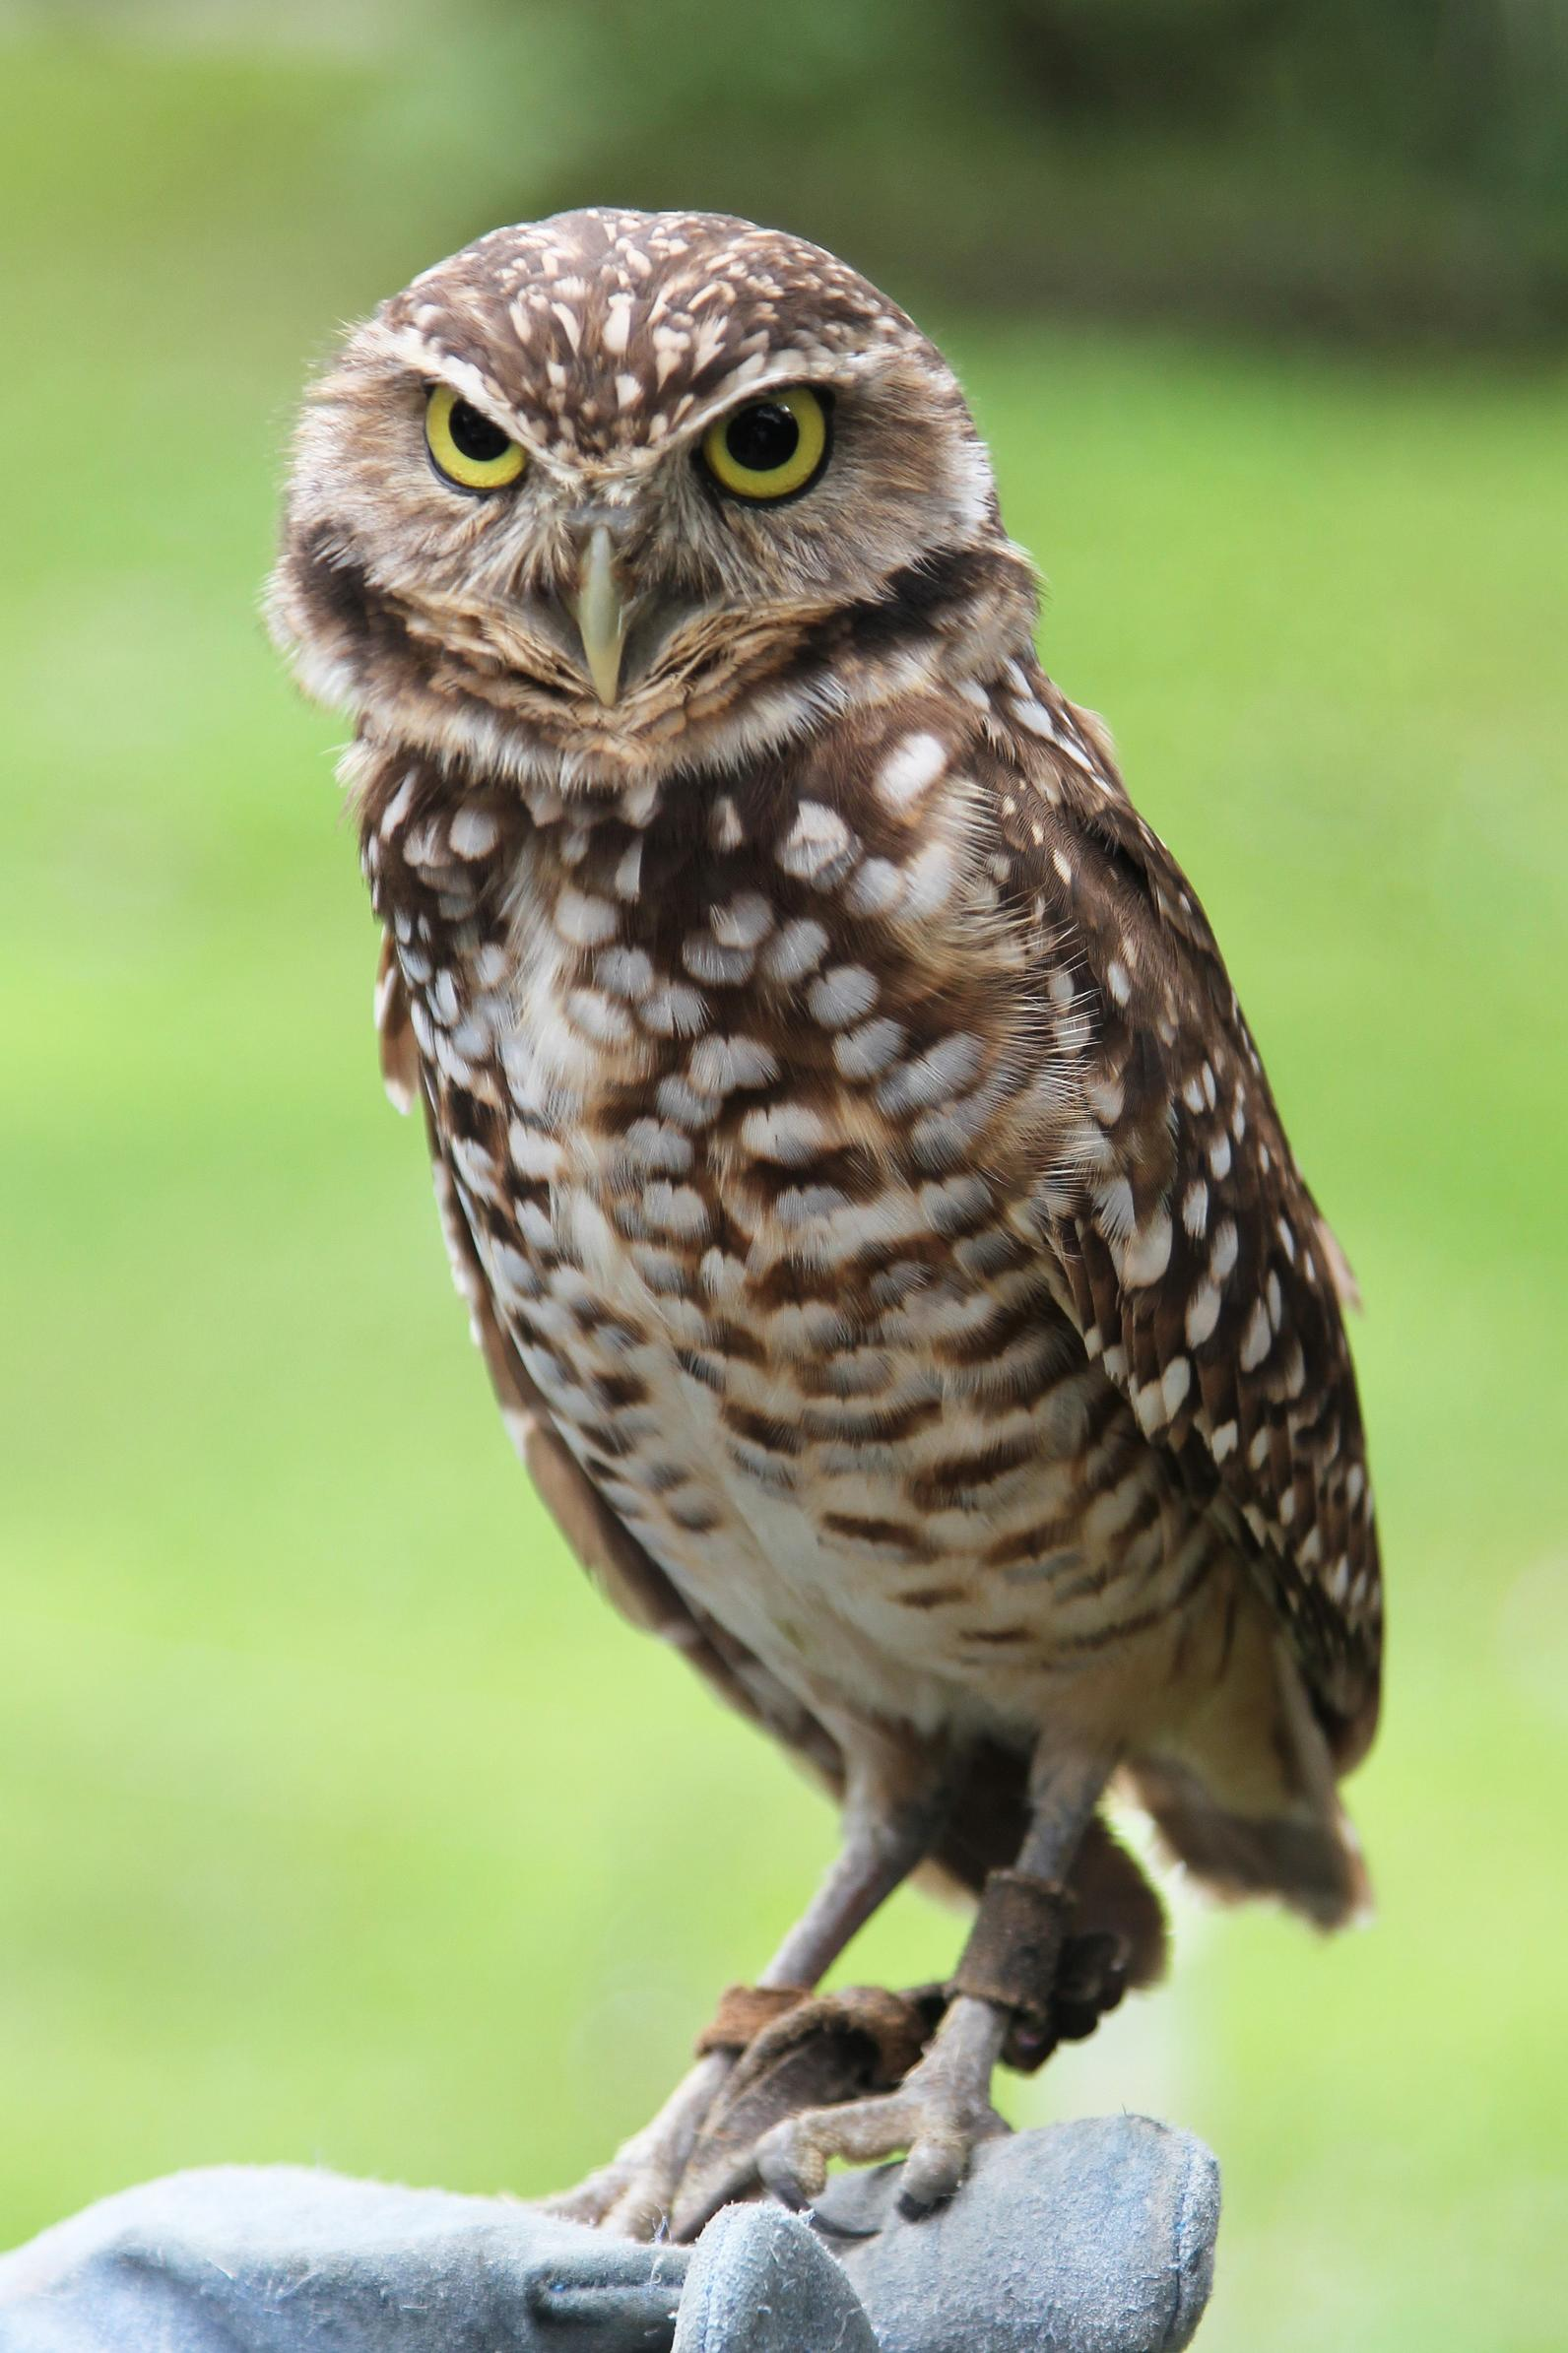

In [53]:
print("I don't know what it can be.")
display(Image(filename="test_images/owl.jpg", width=200))

In [54]:
!python pipeline.py "I don't know what it can be." "test_images/owl.jpg"

Processing...
Error: No entity found.
False


Device set to use cpu


Case 4: Statement contain two (or more) animal titles.

I guess it's an eagle or crow.


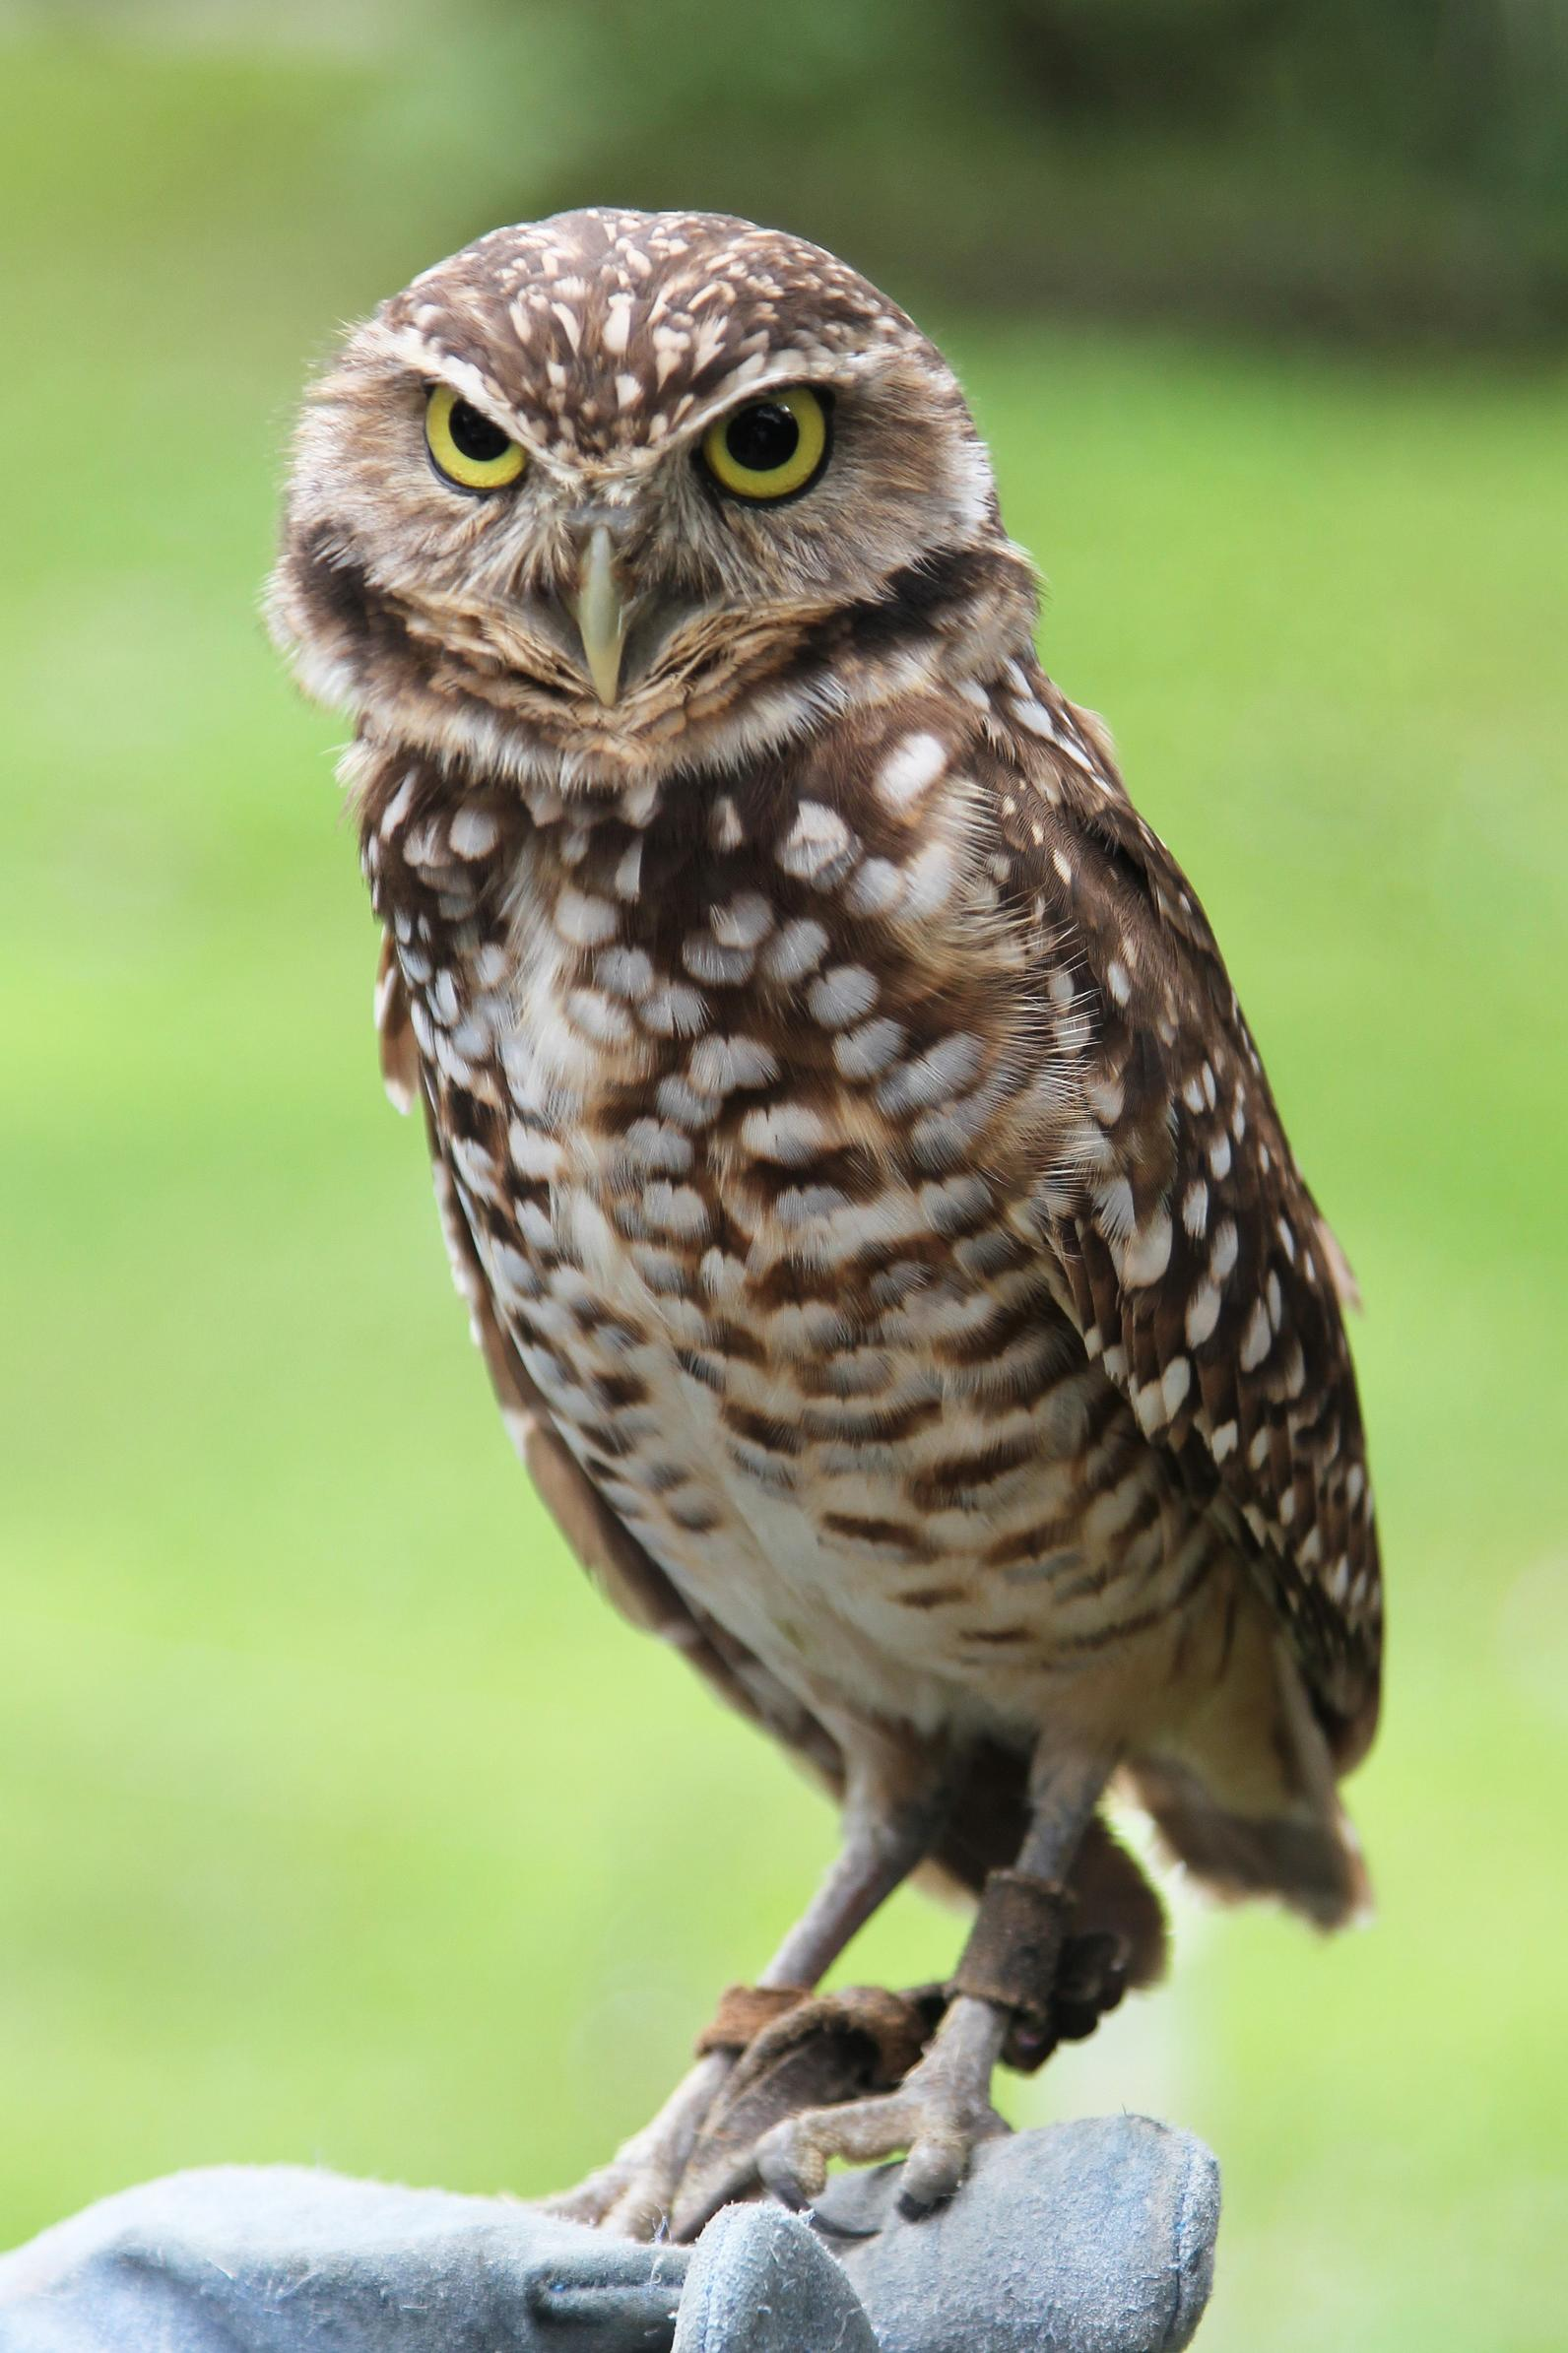

In [55]:
print("I guess it's an eagle or crow.")
display(Image(filename="test_images/owl.jpg", width=200))

In [56]:
!python pipeline.py "I guess it's an eagle or crow." "test_images/owl.jpg"

Processing...

Device set to use cpu



Error: Please provide only one answer.
False


Case 5: Image doesn't belong to any classes.

Maybe there is a penguin on the image, but I'm not sure.


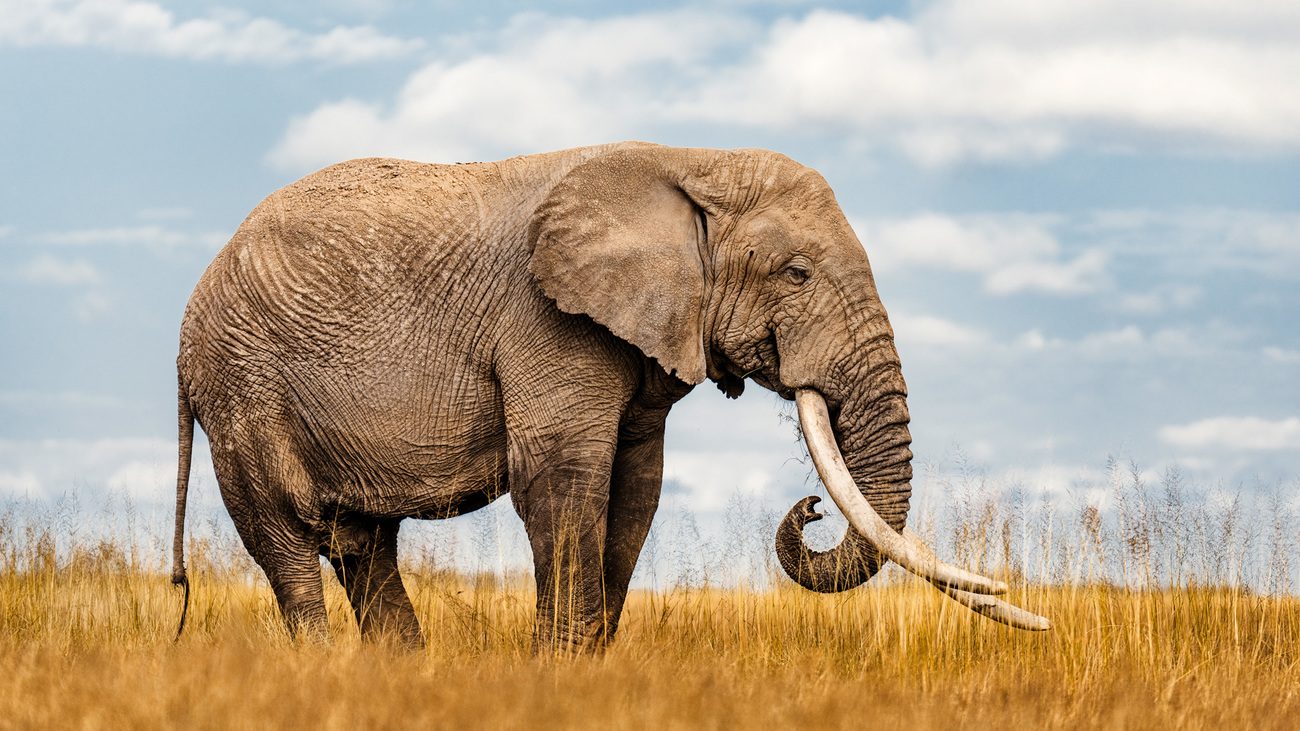

In [57]:
print("Maybe there is a penguin on the image, but I'm not sure.")
display(Image(filename="test_images/elephant.jpg", width=200))

In [58]:
!python pipeline.py "Maybe there is a penguin on the image, but I'm not sure." "test_images/elephant.jpg"

Processing...
Unknown animal. The model can't recognize it.
False


Device set to use cpu
